In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read lines from log file
with open('./results/R50-ViT-B_16_lr_0.01_epochs_150/log.txt') as f:
    lines = f.readlines()

In [4]:
lines

['Epoch: 0, Iteration: 0, Loss: 0.9353904724121094, CE Loss: 0.719149649143219, Dice Loss: 1.1516313552856445, IoU: 0.27276065945625305, Dice: 0.428612619638443\n',
 'Epoch: 0, Iteration: 1, Loss: 0.8144310116767883, CE Loss: 0.6913524866104126, Dice Loss: 0.9375095367431641, IoU: 0.3038862943649292, Dice: 0.46612393856048584\n',
 'Epoch: 0, Iteration: 2, Loss: 0.6358798742294312, CE Loss: 0.6668866872787476, Dice Loss: 0.6048730611801147, IoU: 0.3468165695667267, Dice: 0.5150167942047119\n',
 'Epoch: 0, Iteration: 3, Loss: 0.4855812191963196, CE Loss: 0.6209455132484436, Dice Loss: 0.35021695494651794, IoU: 0.45932137966156006, Dice: 0.6294999718666077\n',
 'Epoch: 0, Iteration: 4, Loss: 0.41025787591934204, CE Loss: 0.5549542903900146, Dice Loss: 0.2655614912509918, IoU: 0.6026051044464111, Dice: 0.7520319223403931\n',
 'Epoch: 0, Iteration: 5, Loss: 0.48921746015548706, CE Loss: 0.6087136268615723, Dice Loss: 0.36972129344940186, IoU: 0.35131314396858215, Dice: 0.5199581384658813\n'

In [12]:
# IoU, Dice, Loss, CE Loss, Dice Loss
train_stats = [[], [], [], [], []]
val_stats = [[], [], [], [], []]
test_stats = [[], [], [], [], []]
cols = ['IoU', 'Dice', 'Loss', 'CE Loss', 'Dice Loss']
for line in lines:
    if ('val Data' in line):
        parts = line.split()
        val_stats[0].append(float(parts[3][:-1]))
        val_stats[1].append(float(parts[5][:-1]))
        val_stats[2].append(float(parts[7][:-1]))
        val_stats[3].append(float(parts[10][:-1]))
        val_stats[4].append(float(parts[13]))
    elif ('test Data' in line):
        parts = line.split()
        test_stats[0].append(float(parts[3][:-1]))
        test_stats[1].append(float(parts[5][:-1]))
        test_stats[2].append(float(parts[7][:-1]))
        test_stats[3].append(float(parts[10][:-1]))
        test_stats[4].append(float(parts[13]))
    elif ('Epoch' in line and 'Iteration' not in line):
        parts = line.split()
        train_stats[2].append(float(parts[3][:-1]))
        train_stats[3].append(float(parts[6][:-1]))
        train_stats[4].append(float(parts[9][:-1]))
        train_stats[0].append(float(parts[11][:-1]))
        train_stats[1].append(float(parts[13]))


In [24]:
# print best IoU and Dice on test set
print('Best IoU on test set: ', max(test_stats[0]))
print('Best Dice on test set: ', max(test_stats[1]))

Best IoU on test set:  0.967890739440918
Best Dice on test set:  0.9836741089820862


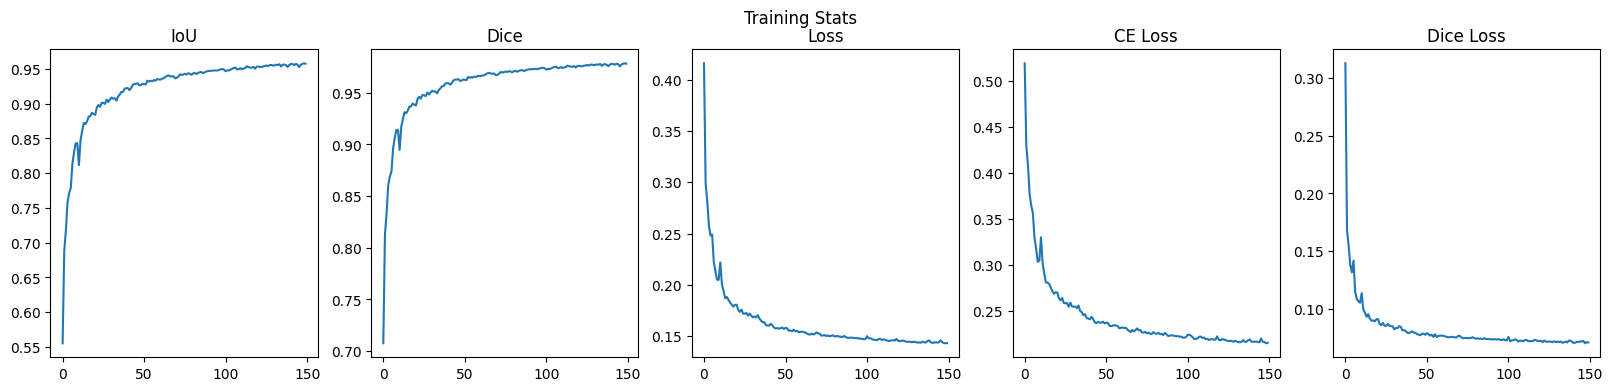

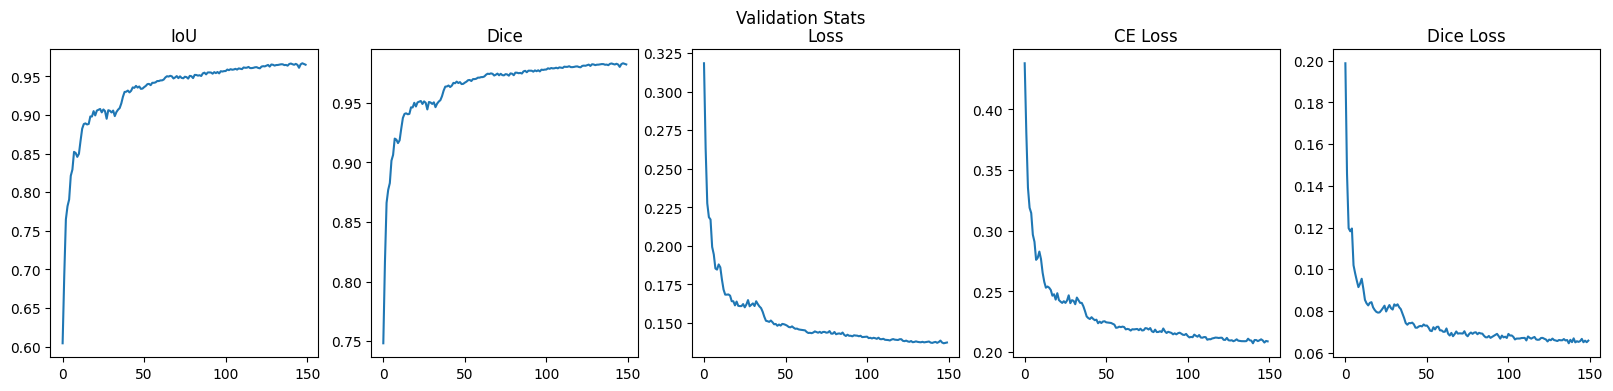

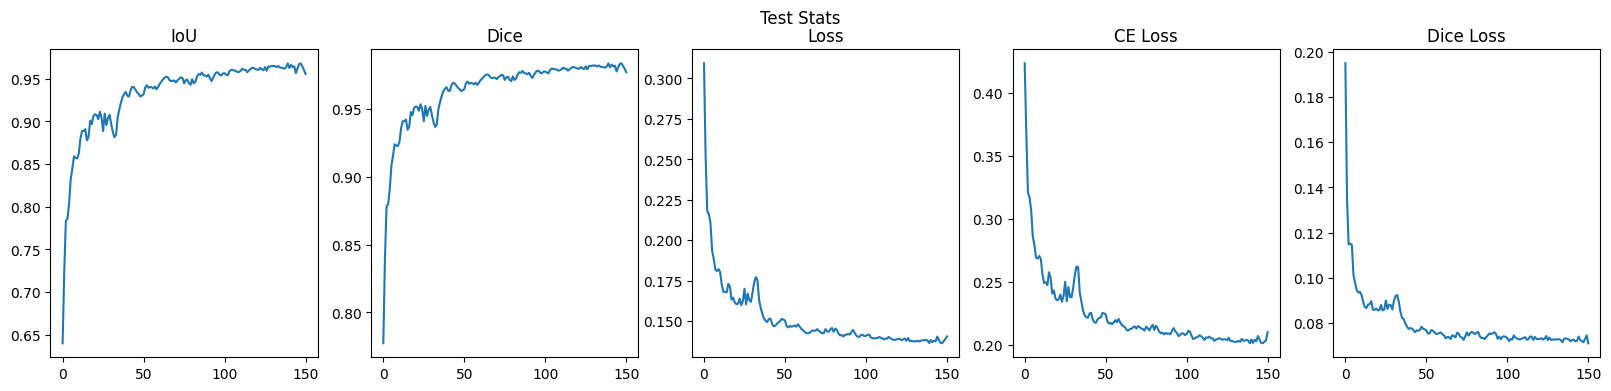

In [13]:
def plot_stats(stats, title):
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    for i in range(5):
        axs[i].plot(stats[i])
        axs[i].set_title(cols[i])
    fig.suptitle(title)
    plt.show()

plot_stats(train_stats, 'Training Stats')
plot_stats(val_stats, 'Validation Stats')
plot_stats(test_stats, 'Test Stats')

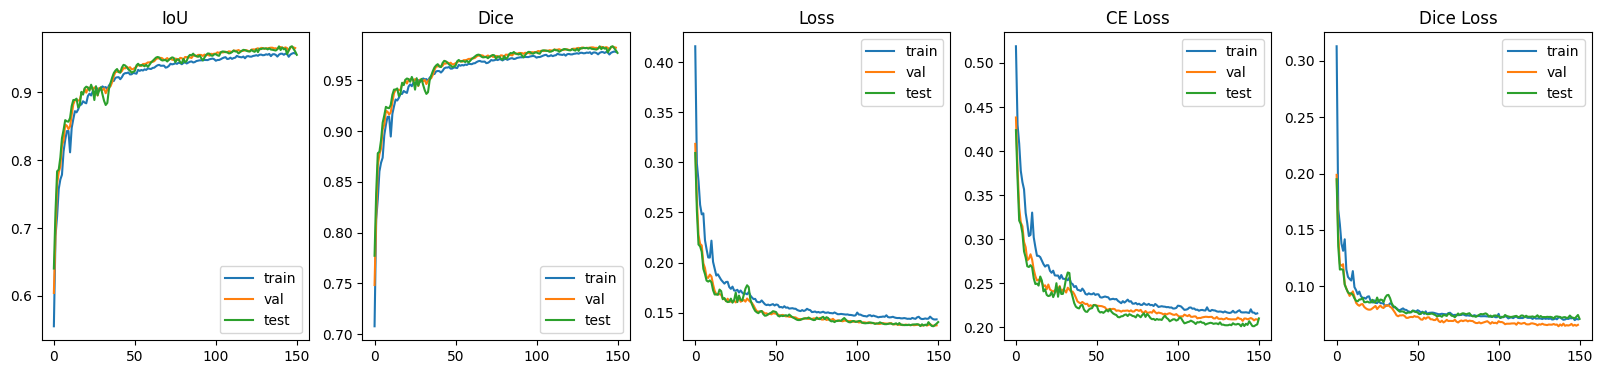

In [14]:
def plot_together():
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    for i in range(5):
        axs[i].plot(train_stats[i], label='train')
        axs[i].plot(val_stats[i], label='val')
        axs[i].plot(test_stats[i], label='test')
        axs[i].set_title(cols[i])
        axs[i].legend()
    plt.show()

plot_together()

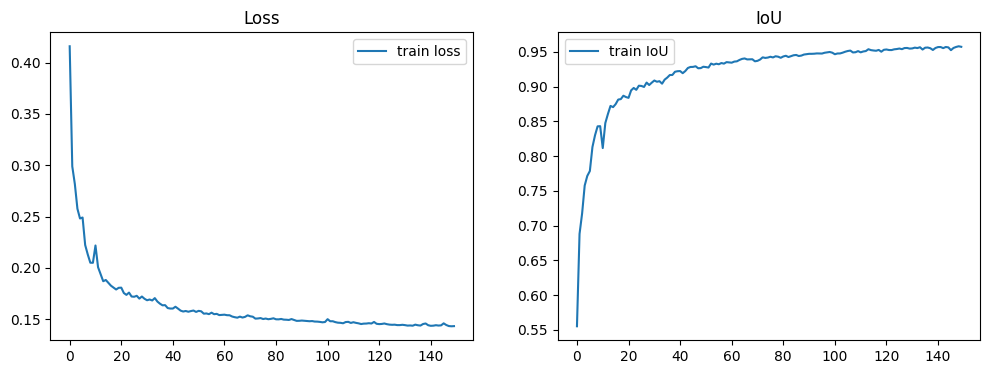

In [17]:
# plot training loss and IoU, 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(train_stats[2], label='train loss')
# axs[0].plot(val_stats[2], label='val loss')
# axs[0].plot(test_stats[2], label='test loss')
axs[0].set_title('Loss')
axs[0].legend()
axs[1].plot(train_stats[0], label='train IoU')
# axs[1].plot(val_stats[0], label='val IoU')
# axs[1].plot(test_stats[0], label='test IoU')
axs[1].set_title('IoU')
axs[1].legend()
plt.show()

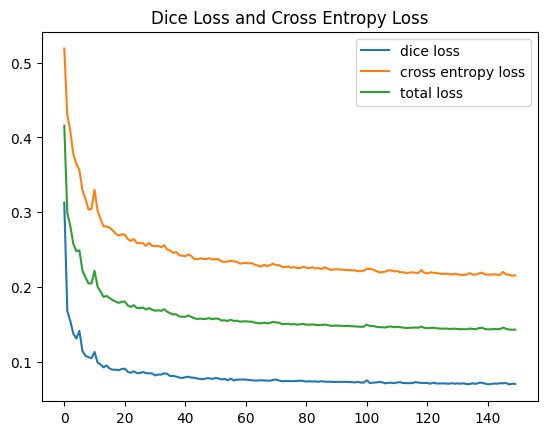

In [23]:
# plot dice loss and cross entropy loss in same plot
plt.plot(train_stats[4], label='dice loss')
plt.plot(train_stats[3], label='cross entropy loss')
plt.plot(train_stats[2], label='total loss')
plt.title('Dice Loss and Cross Entropy Loss')
plt.legend()
plt.show()


In [20]:
# read lines from log file
with open('./results/R50-ViT-B_16_3_1_loss_ratio/log.txt') as f:
    lines = f.readlines()

In [21]:
train_stats2 = [[], [], [], [], []]
val_stats2 = [[], [], [], [], []]
test_stats2 = [[], [], [], [], []]

for line in lines:
    if ('val Data' in line):
        parts = line.split()
        val_stats2[0].append(float(parts[3][:-1]))
        val_stats2[1].append(float(parts[5][:-1]))
        val_stats2[2].append(float(parts[7][:-1]))
        val_stats2[3].append(float(parts[10][:-1]))
        val_stats2[4].append(float(parts[13]))
    elif ('test Data' in line):
        parts = line.split()
        test_stats2[0].append(float(parts[3][:-1]))
        test_stats2[1].append(float(parts[5][:-1]))
        test_stats2[2].append(float(parts[7][:-1]))
        test_stats2[3].append(float(parts[10][:-1]))
        test_stats2[4].append(float(parts[13]))
    elif ('Epoch' in line and 'Iteration' not in line):
        parts = line.split()
        train_stats2[2].append(float(parts[3][:-1]))
        train_stats2[3].append(float(parts[6][:-1]))
        train_stats2[4].append(float(parts[9][:-1]))
        train_stats2[0].append(float(parts[11][:-1]))
        train_stats2[1].append(float(parts[13]))

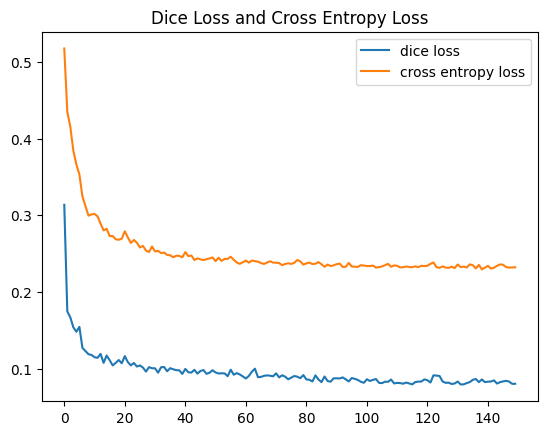

In [22]:
# plot cross entropy loss and dice loss in same plot
plt.plot(train_stats2[4], label='dice loss')
plt.plot(train_stats2[3], label='cross entropy loss')
plt.title('Dice Loss and Cross Entropy Loss')
plt.legend()
plt.show()